In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\pc\Desktop\Porfolio 2\digital_marketing_campaign_dataset.csv')

In [4]:
print("--- Dataset Information ---")
print(df.info())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPu

In [5]:
print("\n--- Summary Statistics ---")
print(df.describe())


--- Summary Statistics ---
        CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14.312269  

# Target is Find Which compaign Channel is effective for Marketing
- Firstly we will group our data by Campaign Channel
- calculate the features related to comaign channel i.e CAC ,CTR etc from this data

In [6]:
# Grouping by Campaign Channel to compare performance
channel_metrics = df.groupby('CampaignChannel').agg({
    'AdSpend': 'sum',
    'Conversion': 'sum',
    'WebsiteVisits': lambda x: (x > 0).sum(),  # Rows with visits act as "Leads"
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'TotalTargeted', 'WebsiteVisits': 'Leads'})

In [7]:
# Mathematical Calculations
channel_metrics['CAC'] = channel_metrics['AdSpend'] / channel_metrics['Conversion']
channel_metrics['CPL'] = channel_metrics['AdSpend'] / channel_metrics['Leads']
channel_metrics['ConvRate'] = (channel_metrics['Conversion'] / channel_metrics['TotalTargeted']) * 100

print("\n--- Channel Performance Summary ---")
print(channel_metrics[['AdSpend', 'CAC', 'CPL', 'ConvRate']])


--- Channel Performance Summary ---
                      AdSpend          CAC          CPL   ConvRate
CampaignChannel                                                   
Email            7.871576e+06  5809.281071  5154.928521  87.026333
PPC              8.199237e+06  5612.071856  5067.513585  88.277946
Referral         8.653519e+06  5700.605195  5105.320758  88.307155
SEO              7.740904e+06  5696.029342  5102.771177  87.677419
Social Media     7.542323e+06  5718.213229  5048.409136  86.833443


In [8]:
funnel_data = pd.DataFrame({
    'Stage': ['Total Targeted', 'Leads (Visitors)', 'Conversions'],
    'Count': [
        len(df),
        len(df[df['WebsiteVisits'] > 0]),
        df['Conversion'].sum()
    ]
})

print("\n--- Funnel Data ---")
print(funnel_data)


--- Funnel Data ---
              Stage  Count
0    Total Targeted   8000
1  Leads (Visitors)   7851
2       Conversions   7012


C:\Users\pc\AppData\Local\Temp\ipykernel_14204\125768190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_metrics.index, y='CAC', data=channel_metrics.sort_values('CAC'), palette='viridis')


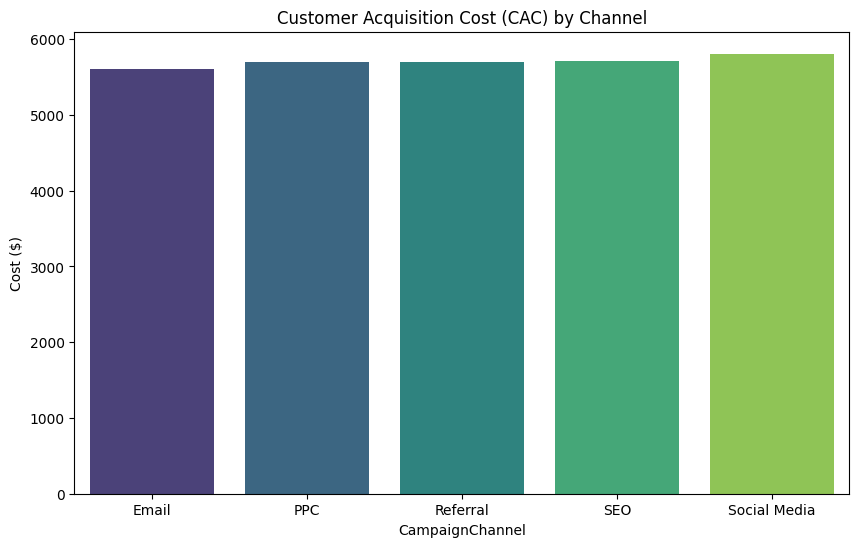

In [10]:
# Visual 1: Customer Acquisition Cost (CAC) by Channel
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_metrics.index, y='CAC', data=channel_metrics.sort_values('CAC'), palette='viridis')
plt.title('Customer Acquisition Cost (CAC) by Channel')
plt.ylabel('Cost ($)')
plt.show();

C:\Users\pc\AppData\Local\Temp\ipykernel_14204\718481171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_metrics.index, y='ConvRate', data=channel_metrics.sort_values('ConvRate', ascending=False), palette='magma')


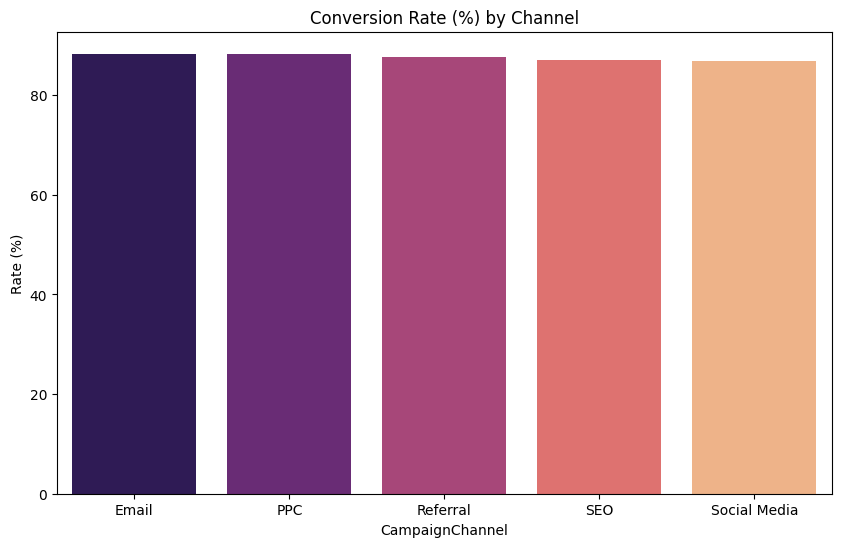

In [11]:
# Visual 2: Conversion Rate (%) by Channel
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_metrics.index, y='ConvRate', data=channel_metrics.sort_values('ConvRate', ascending=False), palette='magma')
plt.title('Conversion Rate (%) by Channel')
plt.ylabel('Rate (%)')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_14204\4286496783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Stage', data=funnel_data, palette='Blues_r')


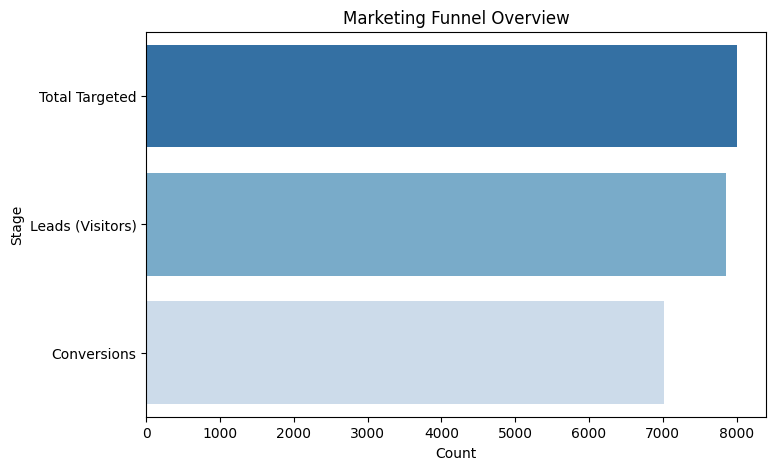

In [12]:
# Visual 3: Funnel Analysis Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Count', y='Stage', data=funnel_data, palette='Blues_r')
plt.title('Marketing Funnel Overview')
plt.show()

In [13]:
# Exporting the summary for documentation
channel_metrics.to_csv('marketing_performance_summary.csv')